<a href="https://colab.research.google.com/github/elio-li/CSCI-4964/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**

## **Question A**

Generate a random network with model G(N, p) where N is the number of nodes and p is the linking probability.

---

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy

def gen_rand_network(N,p):
  G = nx.Graph()
  # add nodes to the graph G
  for i in range (0, N):
	  G.add_node(i)
  
  # for every links between each node
  for i in range (0, N):
    for j in range (i, N):
      # if p is greater than random generated number & it's not it self.
      if (random.uniform(0, 1) < p) & (i != j):
        G.add_edge(i, j)

  return G

In [ ]:
p_a = input("Enter Probability p: ")
p_a = float(p_a)
N_a = input("Enter Number of Nodes N: ")
N_a = int(N_a)

# Print the predicted edges
print("The number of edges SHOULD BE: ", int((p_a * N_a * (N_a - 1)) / 2))

G_a = gen_rand_network(N_a,p_a)
print("Actual number of edges: " + str(G_a.number_of_edges()))

Enter Probability p: 0.4
Enter Number of Nodes N: 10
The number of edges SHOULD BE:  18
Actual number of edges: 19


## **Question B**

Produce and visualize a random network with G(N = 500, p = 0.01), and plot the degree distribution of the network. (Include the data of this network. Explain the format you save the network.)

---

Using the method wrote in question a, each node and edge are placed in the networkx graph object.

In [ ]:
G_b = gen_rand_network(500,0.01)

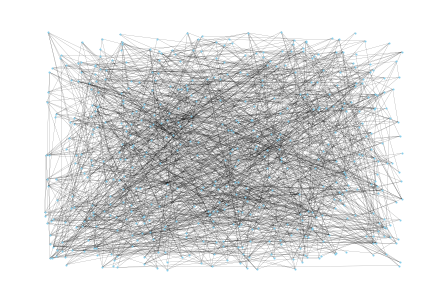

In [ ]:
nx.draw(G_b, 
        node_color='skyblue', node_size=1, 
        width=0.1, edge_cmap=plt.cm.OrRd,
        arrowstyle='->',arrowsize=0.1,
        pos=nx.random_layout(G, seed=13))

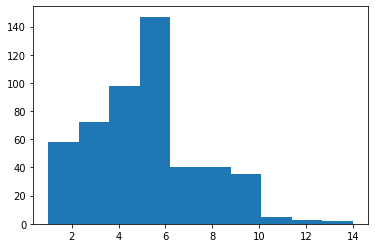

In [ ]:
degrees = [G_b.degree(n) for n in G_b.nodes()]
plt.hist(degrees)
plt.show()

## **Question C**

Produce and 500 random networks with G(N = 10, 000, p = 0.001) and count the number of links, Li (i = 1,2,...,100), in network i. Then, plot the distribution of L. (Include the list of Li, but do not submit the data of the networks.)

---

In [7]:
LLL = []
# Generate 500 Random Networks
for i in range(500):
  G = nx.generators.random_graphs.fast_gnp_random_graph(10000,0.001)
  num_links = G.number_of_edges()
  LLL.append(num_links)

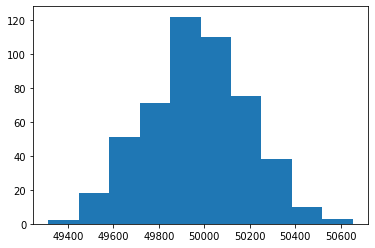

In [8]:
plt.hist(LLL)
plt.show()

## **Question D**

Generate a random network with model G(N, k) where N is the number of nodes and k is the average degree of this network.

---

Since k is $<k> = p(N-1)$, $p = \frac{<k>}{N-1}$.

In [ ]:
k_d = input("Enter Average Degree k: ")
k_d = int(k_d)
N_d = input("Enter Number of Nodes N: ")
N_d = int(N_d)

print("The probability of the graph is: ", k_d/(N_d-1))

G_d = gen_rand_network(N_d,k_d/(N_d-1))
print("Number of edges: " + str(G_d.number_of_edges()))

Enter Average Degree k: 4
Enter Number of Nodes N: 100
The probability of the graph is:  0.04040404040404041
Number of edges: 201


## **Question E**

Produce and visualize a random network with G(N = 500, k = 10), and plot the degree distribution of the network. (Include the data of this network. Explain the format you save the network. )

---

Using the method wrote in question a, each node and edge are placed in the networkx graph object.

In [ ]:
G_e = gen_rand_network(500,10/(500-1))

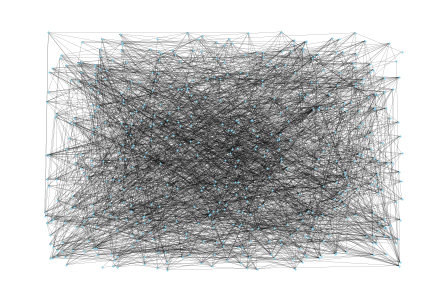

In [ ]:
nx.draw(G_e, 
        node_color='skyblue', node_size=1, 
        width=0.1, edge_cmap=plt.cm.OrRd,
        arrowstyle='->',arrowsize=0.1,
        pos=nx.random_layout(G, seed=13))

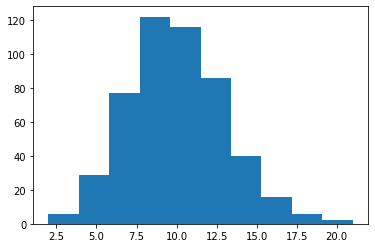

In [ ]:
degrees = [G_e.degree(n) for n in G_e.nodes()]
plt.hist(degrees)
plt.show()

## **Question F**

Randomly remove 50% of nodes from the network in b), calculate the average degree of the rest of the network.

---

In [ ]:
Nodes_f = G_b.nodes()
NodesCount_f = G_b.number_of_nodes()
RandomNodes_f = random.sample(Nodes_f, 250)

In [ ]:
G_f = G_b
G_f.remove_nodes_from(RandomNodes_f)

In [ ]:
TotalNodes_f = G_f.number_of_nodes()
TotalEdges_f = G_f.number_of_edges()
print("Total Nodes: ", TotalNodes_f, "\nTotal Edges: ", TotalEdges_f)

Total Nodes:  250 
Total Edges:  306


In [ ]:
AverageDegree_f = TotalEdges_f/TotalNodes_f
print("Average Degree of the Graph is: ", AverageDegree_f)

Average Degree of the Graph is:  1.224


## **Question G**

What are the sizes of largest cluster and second largest cluster in the rest of network in f)?

---

In [ ]:
ClusterLists_g = []
for c in nx.connected_components(G_f):
  ClusterLists_g.append(len(c))

In [ ]:
ClusterLists_g

[223, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
import heapq
heapq.nlargest(2, ClusterLists_g)

[223, 4]

The largest connected component have 223 nodes, where the second largest one contains only 4 nodes.

## **Question H**

Randomly remove 70% of nodes from the network in e), calculate the average degree of the rest of the network.

---

In [ ]:
Nodes_h = G_e.nodes()
NodesCount_h = G_e.number_of_nodes()
RandomNodes_h = random.sample(Nodes_h, 150)

In [ ]:
G_h = G_e
G_h.remove_nodes_from(RandomNodes_h)

In [ ]:
TotalNodes_h = G_h.number_of_nodes()
TotalEdges_h = G_h.number_of_edges()
print("Total Nodes: ", TotalNodes_h, "\nTotal Edges: ", TotalEdges_h)

Total Nodes:  350 
Total Edges:  1217


In [ ]:
AverageDegree_h = TotalEdges_h/TotalNodes_h
print("Average Degree of the Graph is: ", AverageDegree_h)

Average Degree of the Graph is:  3.4771428571428573


## **Question I**

What are the sizes of largest cluster and second largest cluster in the rest of network in h).

---

In [ ]:
ClusterLists_i = []
for c in nx.connected_components(G_h):
  ClusterLists_i.append(len(c))

In [ ]:
ClusterLists_i

[350]

In [ ]:
import heapq
heapq.nlargest(2, ClusterLists_i)

[350]

The network is FULLY connected, thus have 350 nodes contained as the largest cluster.